<a href="https://colab.research.google.com/github/Kumarkashish511/PREDICTIVE_ANALYSIS/blob/main/Sampling_Assignment_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [25]:
df = pd.read_csv("Creditcard_data.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
print(df['Class'].value_counts())

Class
0    763
1      9
Name: count, dtype: int64


In [27]:
# Separate majority and minority classes
normal_data = df.query("Class == 0")
fraud_data = df.query("Class == 1")

# Oversample minority class to match majority size
fraud_resampled = fraud_data.sample(
    n=normal_data.shape[0],
    replace=True,
    random_state=42
)

# Combine both classes and shuffle
final_df = (
    pd.concat([normal_data, fraud_resampled])
      .sample(frac=1, random_state=42)
      .reset_index(drop=True)
)


In [28]:
# S1: Simple Random Sampling (20%)
sample_random = balanced_df.sample(
    frac=0.2,
    random_state=1
)

# S2: Systematic Sampling (pick every 2nd record)
sample_systematic = balanced_df.iloc[::2]

# S3: Stratified Sampling (60% train split)
sample_stratified, _ = train_test_split(
    balanced_df,
    train_size=0.6,
    stratify=balanced_df["Class"],
    random_state=42
)

# S4: Cluster Sampling (divide into 5 clusters, pick first 2)
clusters = np.array_split(balanced_df, 5)
sample_cluster = pd.concat(clusters[:2])

# S5: Bootstrap Sampling (sampling with replacement)
sample_bootstrap = balanced_df.sample(
    frac=1,
    replace=True,
    random_state=42
)

# Store all samples together
samples = [
    sample_random,
    sample_systematic,
    sample_stratified,
    sample_cluster,
    sample_bootstrap
]

sample_names = [
    "Simple Random",
    "Systematic",
    "Stratified",
    "Cluster",
    "Bootstrap"
]


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [29]:
# Initialize classification models
model_pool = {
    "Model_Logistic": LogisticRegression(max_iter=2000),
    "Model_DecisionTree": DecisionTreeClassifier(),
    "Model_RandomForest": RandomForestClassifier(),
    "Model_KNN": KNeighborsClassifier(n_neighbors=1),
    "Model_SVM": SVC()
}

# Short names for visualization / reporting
model_names = [
    "Logistic",
    "Decision Tree",
    "Random Forest",
    "KNN",
    "SVM"
]


In [30]:
# Create result table to store model performance
results_table = pd.DataFrame(
    index=model_names,
    columns=sample_names
)


In [31]:
# Train each model on every sampling technique
for model_idx, clf in enumerate(model_pool.values()):
    for sample_idx, data_part in enumerate(samples):

        # Split predictors and label
        features = data_part.drop(columns=["Class"])
        target = data_part["Class"]

        # Stratified train-test split (80-20)
        X_tr, X_te, y_tr, y_te = train_test_split(
            features,
            target,
            test_size=0.2,
            stratify=target,
            random_state=42
        )

        # Fit model & predict
        clf.fit(X_tr, y_tr)
        predictions = clf.predict(X_te)

        # Store accuracy
        accuracy = round(
            accuracy_score(y_te, predictions) * 100,
            2
        )

        results_table.iloc[model_idx, sample_idx] = accuracy


In [32]:
print("Accuracy Matrix")
print(res_matrix)

Accuracy Matrix
             Simple Random Systematic Stratified Cluster Bootstrap
Logistic             95.08       91.5      90.71   89.43     95.42
DecisionTree         98.36      99.35      98.91   97.56     99.02
RandomForest         100.0      100.0      100.0   100.0     100.0
KNN                  96.72      97.39      98.36   98.37     99.02
SVC                  81.97      64.05      63.93   66.67      73.2


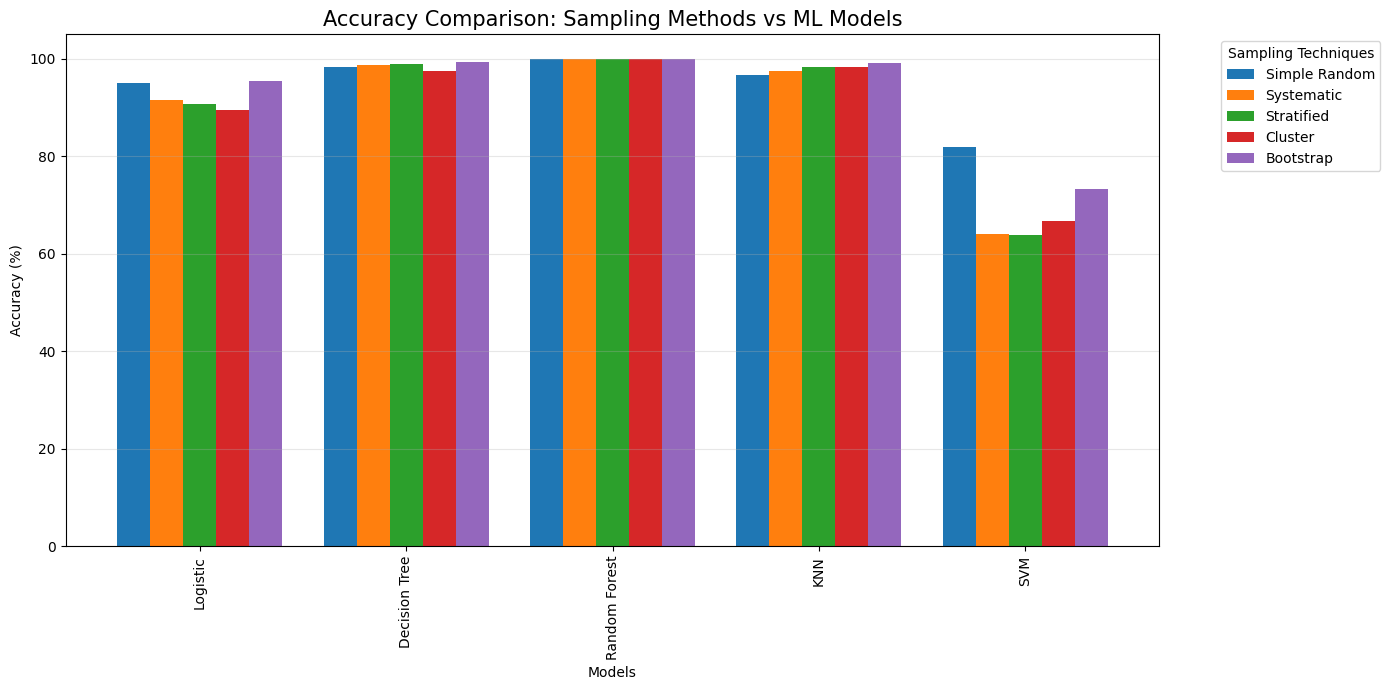

In [33]:
# Plot: Accuracy comparison across models and sampling methods
fig, ax = plt.subplots(figsize=(14, 7))

results_table.astype(float).plot(kind="bar",width=0.8,ax=ax)

ax.set_title("Accuracy Comparison: Sampling Methods vs ML Models",fontsize=15)
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy (%)")

ax.legend(
    title="Sampling Techniques",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

ax.grid(axis="y", alpha=0.3)
plt.tight_layout()


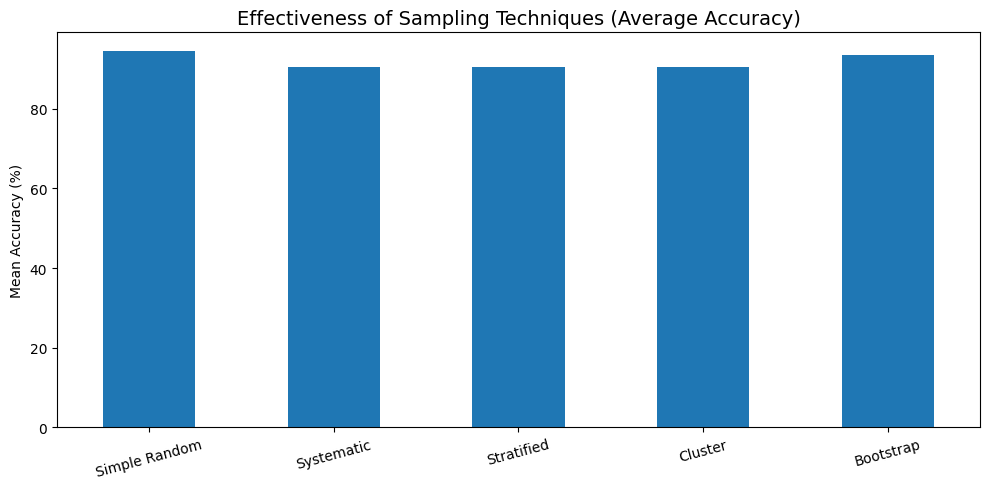

In [34]:
# Plot: Average accuracy for each sampling method
fig, ax = plt.subplots(figsize=(10, 5))

results_table.astype(float).mean().plot(kind="bar",ax=ax)

ax.set_title("Effectiveness of Sampling Techniques (Average Accuracy)",fontsize=14)
ax.set_ylabel("Mean Accuracy (%)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.tight_layout()
